In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### - Прочитайте csv файл (використовуйте функцію read_csv)
#### - Виведіть перші п'ять рядків (використовується функція head)
#### - Виведіть розміри датасету (використовуйте атрибут shape)

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.head(5))
print(df.shape)
df.info()

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----- 

### Відповідь: Датасет зберігає дані про 550 книг

#### - Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [3]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


### Відповідь: Пропуски відсутні

#### - Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [4]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


### Відповідь: Є два унікальні жанри: 'Non Fiction' та 'Fiction'

#### - Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

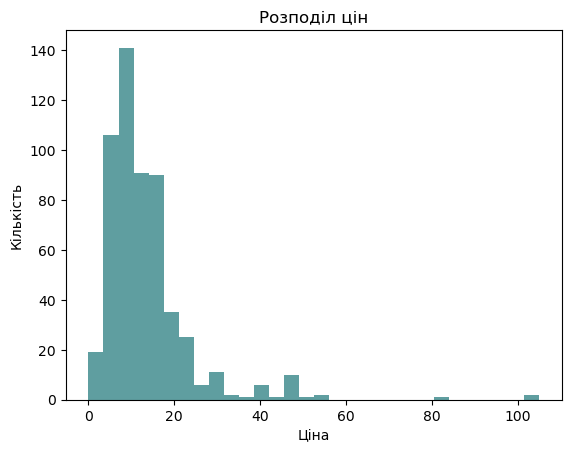

In [5]:
df['price'].plot(kind='hist', bins=30, color='cadetblue')
plt.title('Pозподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.show()

#### - Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [6]:
max_price = df['price'].max()
print("Максимальна ціна:", max_price)

min_price = df['price'].min()
print("Мінімальна ціна:", min_price)

mean_price = df['price'].mean()
print("Середня ціна:", mean_price)

median_price = df['price'].median()
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


### Відповідь: Максимальна ціна 105
### Відповідь: Мінімальна ціна 0
### Відповідь: Середня ціна 13.1
### Відповідь: Медіанна ціна 11.0

#### - Який рейтинг у датасеті найвищий?

In [7]:
print(df['user_rating'].max())

4.9


### Відповідь: 4.9

#### - Скільки книг мають такий рейтинг?

In [8]:
filtered_df = df[df['user_rating'] == 4.9]
print(filtered_df.shape[0])

52


### Відповідь: 52

#### - Яка книга має найбільше відгуків?

In [9]:
print(df[df['reviews'] == df['reviews'].max()])

                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


### Відповідь: Найбільше відгуків має книга "Where the Crawdads Sing", Delia Owens

#### - З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [10]:
df_2015 = df[df['year'] == 2015]
print(df_2015[df_2015['price'] == df_2015['price'].max()])

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


### Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, найдорожча книга "Publication Manual of the American Psychologic"

#### - Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [11]:
print(df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape)

(20, 7)


### Відповідь: 20 книг жанру Fiction потрапили до Топ-50 у 2010 році

#### - Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [12]:
print(df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)].shape)

(1, 7)


### Відповідь: З рейтингом 4.9 до рейтингу у 2010 та 2011 роках потрапила 1 книга

#### - Відсортуйте за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [13]:
print(df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price'))

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

#### - Яка книга остання у відсортованому списку?

In [14]:
print(df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price').iloc[-1])

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


### Відповідь: Остання у відсортованому списку книга "Old School (Diary of a Wimpy Kid #10)", Jeff Kinney

#### - Знайдіть максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min)

In [15]:
print(df.groupby('genre').agg({'price': ['min', 'max']}))

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


### Відповідь: Максимальна ціна для жанру Fiction: 82
### Відповідь: Мінімальна ціна для жанру Fiction: 0
### Відповідь: Максимальна ціна для жанру Non Fiction: 105
### Відповідь: Мінімальна ціна для жанру Non Fiction: 0

#### - Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).

In [16]:
agg_data_1 = df.groupby('author').agg({'name': ['count']}).reset_index()
print(agg_data_1.shape)
print(agg_data_1.sort_values(by=('name', 'count')).iloc[-1])

(248, 2)
author           Jeff Kinney
name    count             12
Name: 120, dtype: object


### Якої розмірності вийшла таблиця? Відповідь: 248 rows x 2 columns
### Який автор має найбільше книг? Відповідь: Jeff Kinney
### Скільки книг цього автора? Відповідь: 12

#### - Cтворіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).

In [17]:
agg_data_2 = df.groupby('author').agg({'user_rating': ['mean']}).reset_index().round(2)
print(agg_data_2)
print(agg_data_2.sort_values(by=('user_rating', 'mean')).iloc[0])

                         author user_rating
                                       mean
0              Abraham Verghese        4.60
1                Adam Gasiewski        4.40
2                 Adam Mansbach        4.80
3                     Adir Levy        4.80
4    Admiral William H. McRaven        4.70
..                          ...         ...
243             Walter Isaacson        4.57
244               William Davis        4.40
245            William P. Young        4.60
246            Wizards RPG Team        4.80
247                Zhi Gang Sha        4.60

[248 rows x 2 columns]
author               Donna Tartt
user_rating  mean            3.9
Name: 71, dtype: object


### У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
### Який у цього автора середній рейтинг? Відповідь: 3.9

#### - З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [18]:
result_data = pd.concat([agg_data_1.set_index("author"), agg_data_2.set_index("author")], axis=1).reset_index()
print(result_data)

                         author  name user_rating
                                count        mean
0              Abraham Verghese     2        4.60
1                Adam Gasiewski     1        4.40
2                 Adam Mansbach     1        4.80
3                     Adir Levy     1        4.80
4    Admiral William H. McRaven     1        4.70
..                          ...   ...         ...
243             Walter Isaacson     3        4.57
244               William Davis     2        4.40
245            William P. Young     2        4.60
246            Wizards RPG Team     3        4.80
247                Zhi Gang Sha     2        4.60

[248 rows x 3 columns]


#### - Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [19]:
print(result_data.sort_values(by=[('name', 'count'), ('user_rating', 'mean')]))

                                 author  name user_rating
                                        count        mean
171                      Muriel Barbery     1        4.00
43                         Chris Cleave     1        4.10
109                   Ian K. Smith M.D.     1        4.10
186                        Pierre Dukan     1        4.10
81                     Elizabeth Strout     1        4.20
..                                  ...   ...         ...
11   American Psychological Association    10        4.50
226                     Suzanne Collins    11        4.66
92                         Gary Chapman    11        4.74
197                        Rick Riordan    11        4.77
120                         Jeff Kinney    12        4.80

[248 rows x 3 columns]


### Який автор перший у списку? Відповідь: Muriel Barbery

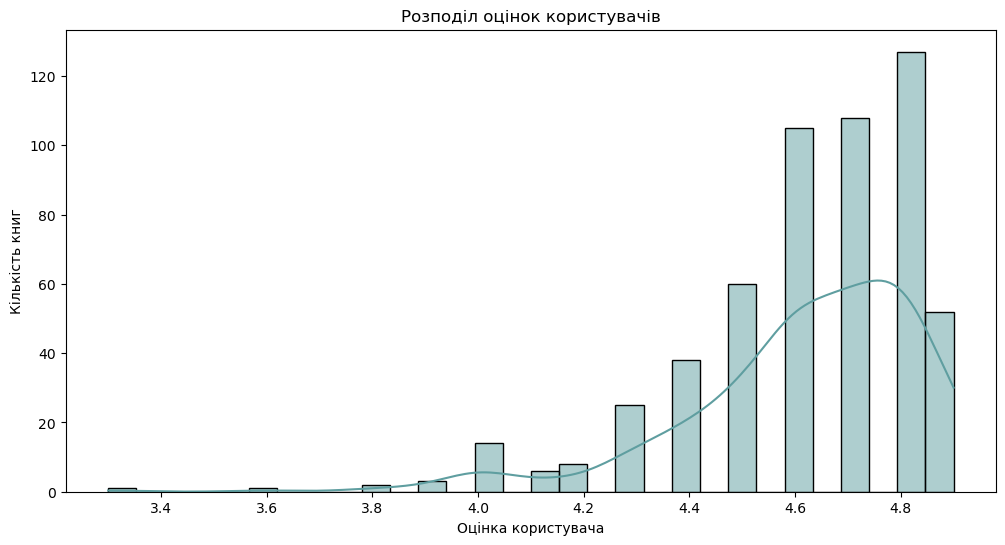

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='user_rating', bins=30, kde=True, color='cadetblue')
plt.title('Розподіл оцінок користувачів')
plt.xlabel('Оцінка користувача')
plt.ylabel('Кількість книг')
plt.show()

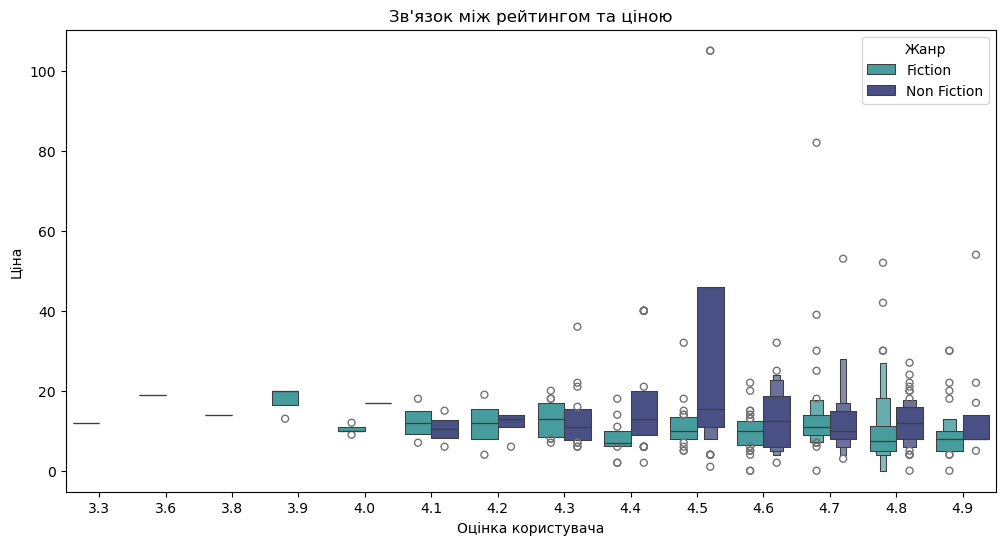

In [21]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("mako_r", 2)
ax = sns.boxenplot(data=df, x='user_rating', y='price', hue='genre', palette=palette)
plt.title('Зв\'язок між рейтингом та ціною')
plt.xlabel('Оцінка користувача')
plt.ylabel('Ціна')
plt.legend(title='Жанр')
plt.show()

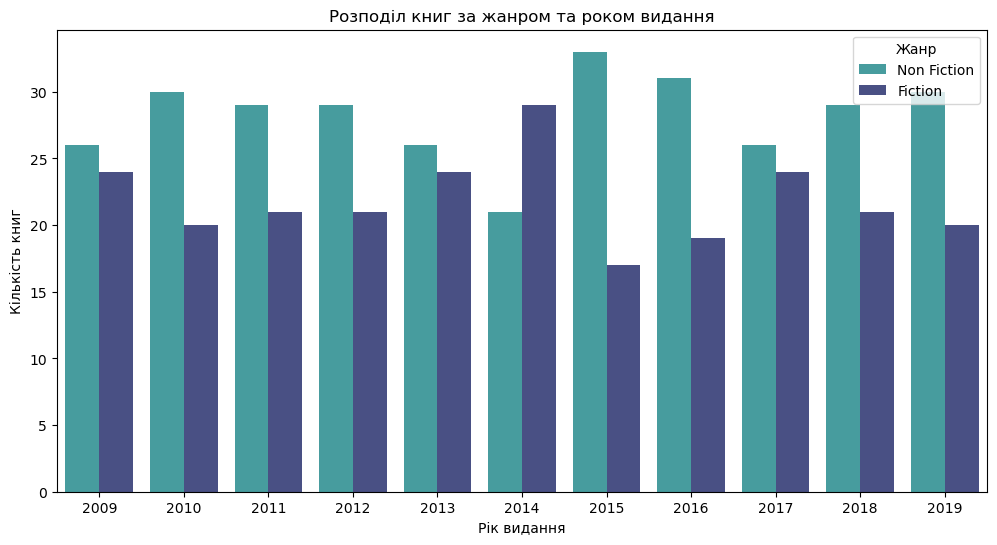

In [22]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("mako_r", 2)
ax = sns.countplot(data=df, x='year', palette=palette, hue='genre')
plt.title('Розподіл книг за жанром та роком видання')
plt.xlabel('Рік видання')
plt.ylabel('Кількість книг')
plt.legend(title='Жанр')
plt.show()